In [1]:
using Cosmology
using Cosmology: integrate
using PyPlot
using JLD2
using Dierckx

┌ Info: Recompiling stale cache file /home/marius/.julia/compiled/v1.1/Cosmology/REPw9.ji for Cosmology [2b3c750e-bc73-11e8-3d6c-0d23c334b2a7]
└ @ Base loading.jl:1184
┌ Warning: Replacing docs for `Cosmology.η :: Union{}` in module `Cosmology`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `Cosmology.τ :: Union{}` in module `Cosmology`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `Cosmology.τdrag :: Union{}` in module `Cosmology`
└ @ Base.Docs docs/Docs.jl:223


In [24]:
p = new_params(H0=67., ωb=0.0225, ωc=0.12, mν=0.06eV, Nν_massive=1., Nν_massless=2.046, reltol=1e-4);

   1.5017268996915245E-003   3426.2069422384589       0.67000000000000004     


In [25]:
(H0 -> (p = new_params(H0=67., ωb=0.0225, ωc=0.12, mν=0.06eV, Nν_massive=1., Nν_massless=2.046, reltol=1e-3); rs_vis(p)))

#15 (generic function with 1 method)

In [26]:
@self Params gvis(z) = ⅆτ_ⅆz(z) * exp(-τ(z))

gvis (self function of type Params)

In [27]:
z = 10 .^ range(5,1,length=128);

In [28]:
@self Params ⅆrsvis_ⅆlnH_term1(z) = (exp(-τ(z))-1) * ⅆrs_ⅆz(z)
@self Params ⅆrsvis_ⅆlnH_term2(z) = -gvis(z)*rs(z)
@self Params ⅆrsvis_ⅆlnH_term3(z) = ⅆτ_ⅆz(z) * integrate(z′->gvis(z′)*rs(z′), z, Inf)

@self Params ⅆrsvis_ⅆlnH(z) = ⅆrsvis_ⅆlnH_term1(z) + ⅆrsvis_ⅆlnH_term2(z) + ⅆrsvis_ⅆlnH_term3(z)

ⅆrsvis_ⅆlnH (self function of type Params)

In [29]:
@self Params ⅆexprdeffr²_ⅆlnH_term1(z,r) = (1-exp(-τ(z))) * exp(-(rd(z)/r)^2)/r^2 * ⅆrd²_ⅆz(z)
@self Params ⅆexprdeffr²_ⅆlnH_term2(z,r) = -gvis(z)*exp(-(rd(z)/r)^2)
@self Params ⅆexprdeffr²_ⅆlnH_term3(z,r) = ⅆτ_ⅆz(z) * integrate(z′->gvis(z′)*exp(-(rd(z′)/r)^2), z, Inf)

@self Params ⅆexprdeffr²_ⅆlnH(z,r) = ⅆexprdeffr²_ⅆlnH_term1(z,r) + ⅆexprdeffr²_ⅆlnH_term2(z,r) + ⅆexprdeffr²_ⅆlnH_term3(z,r)

ⅆexprdeffr²_ⅆlnH (self function of type Params)

In [30]:
@load "rs_rd_figure.jld2" p z drs drs′ drd drd′

6-element Array{Symbol,1}:
 :p   
 :z   
 :drs 
 :drs′
 :drd 
 :drd′

In [31]:
rsvis = rs_vis(p);

In [32]:
αrs = 1/rsvis;

In [33]:
@time drs = αrs * ⅆrsvis_ⅆlnH.(p,z);

213.395589 seconds (7.15 G allocations: 119.374 GiB, 16.10% gc time)


In [34]:
@time drs′ = αrs * ⅆrsvis_ⅆlnH_term1.(p,z);

  0.121404 seconds (5.56 M allocations: 94.824 MiB, 15.99% gc time)


In [35]:
r₀ = 14000 * π/1500 * Mpc

5.597977538383105e58

In [13]:
r₀ = 30Mpc;

In [36]:
rdeff = rd_vis(p,r₀);

In [37]:
αrd = (exp(-(rdeff/r₀)^2) * (-2/r₀^2) * rdeff^2)^-1;

In [38]:
@time drd = αrd * ⅆexprdeffr²_ⅆlnH.(p,z,r₀);

 64.572880 seconds (2.55 G allocations: 42.537 GiB, 18.13% gc time)


In [39]:
@time drd′ = αrd * ⅆexprdeffr²_ⅆlnH_term1.(p,z,r₀);

  2.330437 seconds (36.34 M allocations: 619.532 MiB, 18.55% gc time)


In [45]:
# @save "rs_rd_figure.jld2" p z drs drs′ drd drd′

In [41]:
rc("patch", linewidth=1.5)
to_rgba = plt.matplotlib.colors.to_rgba;

In [42]:
using DelimitedFiles

In [43]:
using Interpolations
Hz_ϕ4 = LinearInterpolation(eachcol(readdlm("Phi4_TEfull_BAOhlz_Lens_H0_Pant_bf_background.dat",comments=true)[end:-1:1,[1,4]])...);

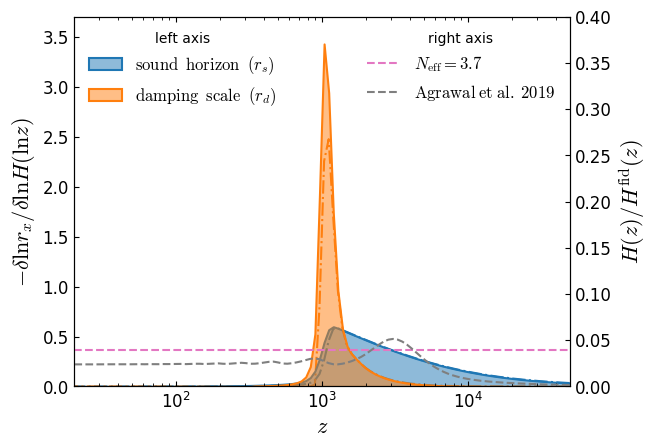

In [44]:
fill_between(z, 0, -z .* drs, edgecolor="C0", facecolor=to_rgba("C0",0.5), label=raw"${\rm sound\;\;horizon} \;\;(r_s)$")
semilogx(z, -z .* drs′, c="C0", ls="-.", zorder=-100)

fill_between(z, 0, -z .* drd, edgecolor="C1", facecolor=to_rgba("C1",0.5), label=raw"${\rm damping\;\;scale} \;\;(r_d)$")
semilogx(z, -z .* drd′, c="C1", ls="-.", zorder=-100)

legend(title="left axis", loc="upper left")

ylim(0,3.7)
xlim(2e1,5e4)
xlabel(raw"$z$")
ylabel(raw"$-\delta \ln r_x / \delta \ln H(\ln z)$")

twinx()



plot(xlim(), fill(0.04,2), "C6--", label=raw"$N_{\rm eff}=3.7$")
plot(z, Hz_ϕ4.(z) ./ (Hubble.(p,z)*Mpc) .- 1, "C7--", label=raw"$\rm Agrawal\; et\; al.\; 2019$")

legend(title="right axis", loc="upper right")

# xscale("linear")
# xlim(50,20000)

ylim(0,0.4)
ylabel(raw"$H(z) / H^{\rm fid}(z)$")

savefig("paper/Figures/rs_rd.pdf", bbox_inches="tight")